In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import mpl_toolkits.axes_grid1 as mag1


class AxisPlot:
    def __init__(self, optop=None, opbottom=None, opleft=None, opright=None,
                 figsize=None, padtop=0.0, padbottom=0.0, padleft=0.0,
                 padright=0.0, **imshowkwargs):
        self.optop = optop
        self.opbottom = opbottom
        self.opleft = opleft
        self.opright = opright
        self.figsize = figsize
        self.padtop = padtop
        self.padbottom = padbottom
        self.padleft = padleft
        self.padright = padright
        self.imshowkwargs = imshowkwargs

        if figsize is None:
            figsize = mp.rcParams['figure.figsize']
        # figsize is (width, height)
        self.aspect_ratio = figsize[0] / figsize[1]

        default_height_frac = 0.2
        # heights is (y, x)
        self.heights = [figsize[0] * default_height_frac,
                        figsize[1] * self.aspect_ratio * default_height_frac]

        return

    def plot(self, X):
        fig, ax = plt.subplots(figsize=self.figsize)
        ax.imshow(X, **self.imshowkwargs)
        divider = mag1.make_axes_locatable(ax)

        x = np.linspace(0, X.shape[1], X.shape[1])
        y = np.linspace(0, X.shape[0], X.shape[0])

        plot_axes = [ax]

        if self.optop:
            ax_top = divider.append_axes('top', self.heights[1],
                                         pad=self.padtop, sharex=ax)
            ax_top.xaxis.set_tick_params(labelbottom=False)
            ax_top.plot(x, self.optop(X, axis=0))
            ax_top.set_xlim(x.min(), x.max())
            plot_axes.append(ax_top)
        if self.opbottom:
            ax_bottom = divider.append_axes('bottom', self.heights[1],
                                            pad=self.padbottom, sharex=ax)
            # turn bottom labels off for the image
            ax.xaxis.set_tick_params(labelbottom=False)
            ax_bottom.xaxis.set_tick_params(labelbottom=True)
            ax_bottom.plot(x, self.opbottom(X, axis=0))
            ax_bottom.set_xlim(x.min(), x.max())
            plot_axes.append(ax_bottom)
        if self.opleft:
            ax_left = divider.append_axes('left', self.heights[0],
                                          pad=self.padleft, sharey=ax)
            # turn left labels off for the image
            ax.yaxis.set_tick_params(labelleft=False)
            ax_left.yaxis.set_tick_params(labelleft=True)
            ax_left.plot(self.opleft(X, axis=1), y)
            ax_left.set_ylim(y.min(), y.max())
            plot_axes.append(ax_left)
        if self.opright:
            ax_right = divider.append_axes('right', self.heights[0],
                                           pad=self.padright, sharey=ax)
            ax_right.yaxis.set_tick_params(labelleft=False)
            ax_right.plot(self.opright(X, axis=1), y)
            ax_right.set_ylim(y.min(), y.max())
            plot_axes.append(ax_right)

        return plot_axes

In [2]:
import unittest
import numpy as np
import matplotlib.pyplot as plt


class TestAxisPlot(unittest.TestCase):
    def test_default(self):
        # generate some data
        dim_x = 512
        dim_y = 256
        x = np.linspace(0, 2 * np.pi, dim_x)
        X = np.random.normal(size=(dim_y, dim_x)) + np.sin(x)
        # create axisplot with mean along the y-axis at the top, and sum along
        # the x-axis on the right
        axisplot = AxisPlot(optop=np.mean, opright=np.sum, cmap='plasma')
        axisplot.plot(X)
        plt.show()

    def test_all_plots(self):
        # generate some data
        dim_x = 512
        dim_y = 256
        x = np.linspace(0, 2 * np.pi, dim_x)
        X = np.random.normal(size=(dim_y, dim_x)) + np.sin(x)
        # create axisplot with mean along the y-axis at the top, sum along the
        # y-axis at the bottom, mean along the x-axis on the left, and sum
        # along the x-axis on the right
        axisplot = AxisPlot(optop=np.mean, opbottom=np.sum, opleft=np.mean,
                            opright=np.sum, cmap='viridis')
        axisplot.plot(X)
        plt.show()

    def test_multiple_plots(self):
        # generate some data
        dim_x = 512
        dim_y = 256
        x = np.linspace(0, 2 * np.pi, dim_x)
        X = np.random.normal(size=(dim_y, dim_x)) + np.sin(x)
        # create axisplot
        axisplot = AxisPlot(optop=np.mean, opright=np.sum)
        axisplot.plot(X)
        # create another axisplot with the same settings
        X = np.random.normal(size=(dim_y, dim_x)) + np.cos(x)
        axisplot.plot(X)
        plt.show()

    def test_axislabels(self):
        # generate some data
        dim_x = 512
        dim_y = 256
        x = np.linspace(0, 2 * np.pi, dim_x)
        X = np.random.normal(size=(dim_y, dim_x)) + np.sin(x)
        # create axisplot and update some tick labels
        axisplot = AxisPlot(optop=np.mean, opright=np.sum)
        [ax, ax_top, ax_right] = axisplot.plot(X)
        ticks = ax.get_xticks()
        labels = ax.get_xticklabels()
        ax.set_xticklabels(map(lambda x: '{:.1f}'.format(x), ticks / 100))
        ax_right.set_xticklabels([])
        plt.show()


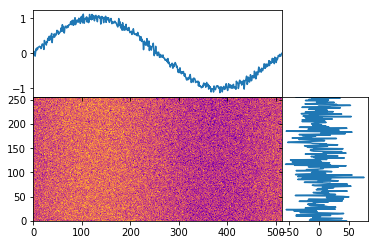

In [3]:
tap = TestAxisPlot()
tap.test_default()

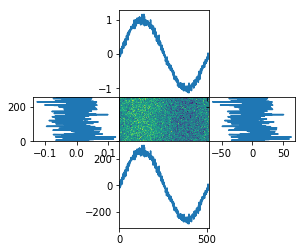

In [4]:
tap.test_all_plots()

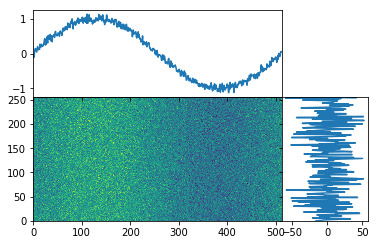

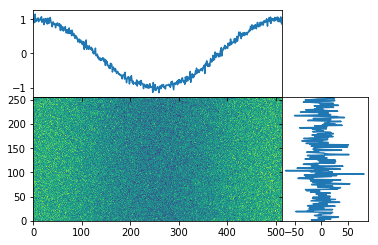

In [5]:
tap.test_multiple_plots()

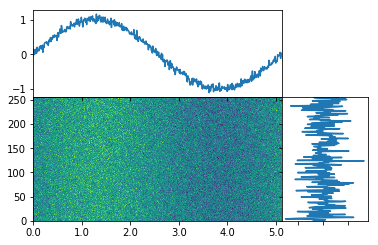

In [6]:
tap.test_axislabels()